In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_excel('data/M1.xlsx')

# Split the data into features (X) and target (y)
X = data.drop(columns=['WPR'])
y = data['WPR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (optional for XGBoost but recommended for consistency)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the training and testing sets
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)


(7008, 6) (1752, 6) (7008,) (1752,)


In [2]:
import xgboost as xgb

# Define the XGBoost model structure
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.01,
    random_state=42
)


In [3]:
# Train the model
xgb_model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [4]:
import joblib

# Save the model
joblib.dump(xgb_model, 'models/xgb_model.joblib')


['models/xgb_model.joblib']

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_train_pred_xgb = xgb_model.predict(X_train_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f'MSE: {mse_xgb}, R²: {r2_xgb}')


MSE: 0.6054249279678314, R²: 0.36506161114745694


In [6]:
# Export actual vs. predicted values to CSV and Excel files
results_xgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
results_train_xgb = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred_xgb})

# Save to Excel
results_xgb.to_excel('results/actual_vs_predicted_xgb.xlsx', index=False)
results_train_xgb.to_excel('results/actual_vs_predicted_train_xgb.xlsx', index=False)


In [7]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f'Mean Absolute Error: {mae_xgb}')


Mean Absolute Error: 0.33305976269645804


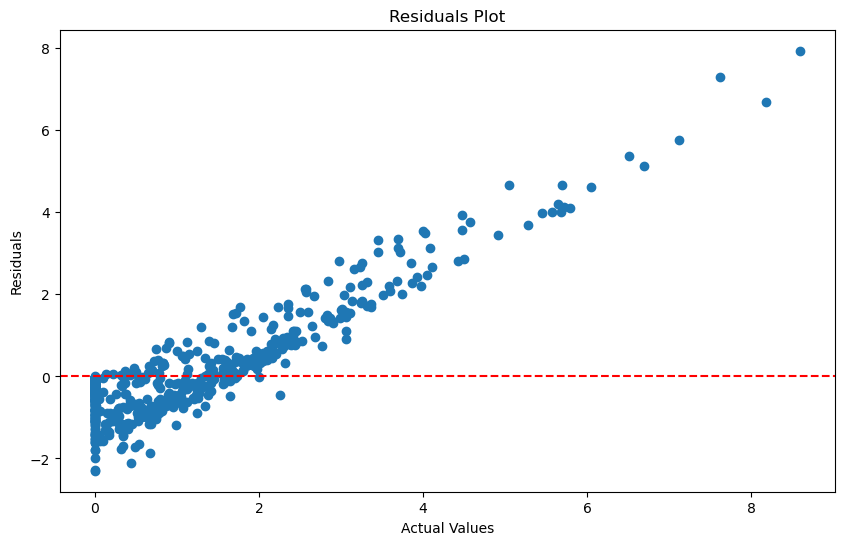

In [8]:
# Plot residuals
import matplotlib.pyplot as plt
residuals_xgb = y_test - y_pred_xgb
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals_xgb)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
